<a href="https://colab.research.google.com/github/FernandoZR83/ANN_DL_ML/blob/master/Audiobooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a ML models capable to prdict whether a customer will buy an audiobook again or not

Balancing the dataset


In [0]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn import preprocessing
import tensorflow as tf

In [0]:
from google.colab import files

In [3]:
data = files.upload()

Saving Audiobooks_data.csv to Audiobooks_data.csv


In [0]:
raw_csv_data = np.loadtxt('Audiobooks_data.csv', delimiter=',')

In [5]:
unscaled_inputs_all = raw_csv_data[:,1:-1]
targets_all = raw_csv_data[:,-1] #Last column of the csv

print("unsclaed_inputs: ", unscaled_inputs_all)
print("targets: ", targets_all)
print(unscaled_inputs_all.shape, targets_all.shape)

unsclaed_inputs:  [[1620.   1620.     19.73 ... 1603.8     5.     92.  ]
 [2160.   2160.      5.33 ...    0.      0.      0.  ]
 [2160.   2160.      5.33 ...    0.      0.    388.  ]
 ...
 [2160.   2160.      6.14 ...    0.      0.      0.  ]
 [1620.   1620.      5.33 ...  615.6     0.     90.  ]
 [1674.   3348.      5.33 ...    0.      0.      0.  ]]
targets:  [0. 0. 0. ... 0. 0. 1.]
(14084, 10) (14084,)


Balance the data

In [6]:
#Our aim first is to know how many ones we have as targets
num_one_targets = int(np.sum(targets_all))
print(num_one_targets)
zero_targets_counter = 0
indices_to_remove = [] #This variable can be either list or tuple so we use empty brackets, contains indices to remove

#Iterate over the dataset and balance it

for i in range(targets_all.shape[0]):
  if targets_all[i] == 0:
    zero_targets_counter += 1
    if zero_targets_counter > num_one_targets:
      indices_to_remove.append(i)
      #if the target at position i is zero and number of zeros is bigger than number 
      #of ones, i'll know the indices of the elements that need to be removed

unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis = 0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis = 0)
print(unscaled_inputs_equal_priors)
print(targets_equal_priors)

2237
[[1620.   1620.     19.73 ... 1603.8     5.     92.  ]
 [2160.   2160.      5.33 ...    0.      0.      0.  ]
 [2160.   2160.      5.33 ...    0.      0.    388.  ]
 ...
 [2160.   2160.      5.33 ...    0.      0.      6.  ]
 [1674.   3348.      7.99 ...    0.      0.      0.  ]
 [1674.   3348.      5.33 ...    0.      0.      0.  ]]
[0. 0. 0. ... 1. 1. 1.]


Standardize inputs

In [7]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)
print(scaled_inputs)

[[ 0.21053387 -0.18888517  1.97823887 ...  4.80955413 11.83828419
   0.09415043]
 [ 1.27894497  0.41646744 -0.39082475 ... -0.41569922 -0.20183481
  -0.80255852]
 [ 1.27894497  0.41646744 -0.39082475 ... -0.41569922 -0.20183481
   2.979214  ]
 ...
 [ 1.27894497  0.41646744 -0.39082475 ... -0.41569922 -0.20183481
  -0.7440775 ]
 [ 0.31737498  1.7482432   0.04679395 ... -0.41569922 -0.20183481
  -0.80255852]
 [ 0.31737498  1.7482432  -0.39082475 ... -0.41569922 -0.20183481
  -0.80255852]]


Shuffle data

In [0]:
# When the data was collected it was actually arranged by date
# Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
# Since we will be batching, we want the data to be as randomly spread out as possible
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

Split the dataset into train, validation and test

In [9]:
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

1776.0 3579 0.49622799664710815
238.0 447 0.5324384787472036
223.0 448 0.49776785714285715


Save the dataset in *.npz

In [0]:
# Save the three datasets in *.npz.
# In the next lesson, you will see that it is extremely valuable to name them in such a coherent way!

np.savez('Audiobooks_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Audiobooks_data_test', inputs=test_inputs, targets=test_targets)

Load data from npz files

In [0]:
npz = np.load('Audiobooks_data_train.npz')

train_inputs=npz['inputs'].astype(np.float)
train_targets=npz['targets'].astype(np.int)
npz = np.load('Audiobooks_data_validation.npz')

validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('Audiobooks_data_test.npz')

test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)


Outline the model

In [12]:
input_size = 10
output_size = 2 #one per digit
hidden_layer_size = 50 #50 nodes per layer
#tf.keras.sequential is a function used to "stack layers"
#Our model's name is model
model = tf.keras.Sequential([
    #we need to flat images to get them a vector
    #First line in sequential function is used to delcare our input layer
    #tf.keras.layers.Flatten(input_shape = (28,28,1)),
    #tf.keras.layers.Dense(output_size) takes the inputs, provided to the model and calculates the dot product of the
    #inputs and the weights and adds the bias.
    #This is also where we can apply an activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    #We create the second hidden layer the same way
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    #Output layer
    tf.keras.layers.Dense(output_size, activation = 'softmax')

])

W0731 03:54:32.423630 140319386036096 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#model.compile(optimizer, loss, metrics) configures the model for training
#custimze_model= tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.summary()

In [23]:
#Batch size
batch_size = 10

#Choose number of epochs
NUM_EPOCHS = 100

model.fit(train_inputs, 
          train_targets,
          batch_size = batch_size,          
          epochs = NUM_EPOCHS, 
          validation_data=(validation_inputs, validation_targets),
          verbose=1)

Train on 3579 samples, validate on 447 samples
Epoch 1/100
3579/3579 [==============================] - 2s 505us/sample - loss: 0.4744 - acc: 0.7390 - val_loss: 0.3984 - val_acc: 0.7852
Epoch 2/100
3579/3579 [==============================] - 1s 308us/sample - loss: 0.3835 - acc: 0.7840 - val_loss: 0.3618 - val_acc: 0.8166
Epoch 3/100
3579/3579 [==============================] - 1s 325us/sample - loss: 0.3645 - acc: 0.8002 - val_loss: 0.3769 - val_acc: 0.7964
Epoch 4/100
3579/3579 [==============================] - 1s 321us/sample - loss: 0.3569 - acc: 0.8025 - val_loss: 0.3589 - val_acc: 0.7897
Epoch 5/100
3579/3579 [==============================] - 1s 317us/sample - loss: 0.3538 - acc: 0.8025 - val_loss: 0.3523 - val_acc: 0.8188
Epoch 6/100
3579/3579 [==============================] - 1s 320us/sample - loss: 0.3495 - acc: 0.8122 - val_loss: 0.3423 - val_acc: 0.8121
Epoch 7/100
3579/3579 [==============================] - 1s 316us/sample - loss: 0.3428 - acc: 0.8161 - val_loss: 0.357

In [14]:
#Overfitted model
#Early stop method need to be implemented. We will use callbacks
#Batch size
batch_size = 10

#Choose number of epochs
NUM_EPOCHS = 100

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_inputs, 
          train_targets,
          batch_size = batch_size,          
          epochs = NUM_EPOCHS, 
          callbacks = [early_stopping],
          validation_data=(validation_inputs, validation_targets),
          verbose=1)


Train on 3579 samples, validate on 447 samples
Epoch 1/100
3579/3579 [==============================] - 2s 497us/sample - loss: 0.4580 - acc: 0.7497 - val_loss: 0.3844 - val_acc: 0.7964
Epoch 2/100
3579/3579 [==============================] - 1s 302us/sample - loss: 0.3745 - acc: 0.7913 - val_loss: 0.3478 - val_acc: 0.8098
Epoch 3/100
3579/3579 [==============================] - 1s 309us/sample - loss: 0.3587 - acc: 0.7958 - val_loss: 0.3454 - val_acc: 0.8233
Epoch 4/100
3579/3579 [==============================] - 1s 306us/sample - loss: 0.3486 - acc: 0.8066 - val_loss: 0.3318 - val_acc: 0.8277
Epoch 5/100
3579/3579 [==============================] - 1s 307us/sample - loss: 0.3432 - acc: 0.8016 - val_loss: 0.3239 - val_acc: 0.8210
Epoch 6/100
3579/3579 [==============================] - 1s 308us/sample - loss: 0.3363 - acc: 0.8094 - val_loss: 0.3072 - val_acc: 0.8367
Epoch 7/100
3579/3579 [==============================] - 1s 306us/sample - loss: 0.3373 - acc: 0.8100 - val_loss: 0.313

In [16]:

#to store in variables test loss and test accuracy, we write:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

448/448 [==============================] - 0s 69us/sample - loss: 0.3582 - acc: 0.7991


In [17]:
print('Test loss: {0:.2f}, Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100))

Test loss: 0.36, Test accuracy: 79.91%


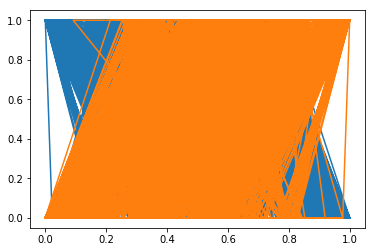

In [22]:
import matplotlib.pyplot as plt

plt.plot(np.squeeze(model.predict_on_batch(train_inputs)),np.squeeze(train_targets))